In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math # Or use np.sqrt

In [2]:
# --- 1. Generate Sample Data ---
# Let's create data where y depends linearly on X1, X2, X3 plus some noise
# y = intercept + coef1*X1 + coef2*X2 + coef3*X3 + noise
np.random.seed(42) # for reproducibility

In [3]:
num_samples = 100
num_features = 3

X = np.random.rand(num_samples, num_features) * 10 # Features values between 0 and 10

In [4]:
# Define true coefficients and intercept
true_intercept = 5.0
true_coefficients = np.array([2.5, -1.2, 0.8])

In [5]:
# Calculate y based on the true linear relationship + random noise
noise = np.random.randn(num_samples) * 2.0 # Gaussian noise
y = true_intercept + X @ true_coefficients + noise

In [6]:
# For clarity, you might use a Pandas DataFrame (optional but common)
feature_names = [f'X{i+1}' for i in range(num_features)]
X_df = pd.DataFrame(X, columns=feature_names)
y_s = pd.Series(y, name='Target_Y')

In [7]:
print("--- Sample Data Head ---")
print(X_df.head())
print(y_s.head())
print("-" * 25)

--- Sample Data Head ---
         X1        X2        X3
0  3.745401  9.507143  7.319939
1  5.986585  1.560186  1.559945
2  0.580836  8.661761  6.011150
3  7.080726  0.205845  9.699099
4  8.324426  2.123391  1.818250
0     8.902027
1    18.038994
2     5.154785
3    31.481917
4    20.667311
Name: Target_Y, dtype: float64
-------------------------


In [8]:
# --- 2. Split Data into Training and Testing Sets ---
# This helps evaluate the model on unseen data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
) # 80% train, 20% test

In [9]:
print(f"Training set size: X={X_train.shape}, y={y_train.shape}")
print(f"Testing set size: X={X_test.shape}, y={y_test.shape}")
print("-" * 25)

Training set size: X=(80, 3), y=(80,)
Testing set size: X=(20, 3), y=(20,)
-------------------------


In [10]:
# --- 3. Create and Train the Model ---
# Instantiate the Linear Regression model
model = LinearRegression()

In [11]:
# Train the model using the training data
# .fit() finds the optimal intercept and coefficients
model.fit(X_train, y_train)

LinearRegression()

In [12]:
print("--- Model Training Complete ---")
print("-" * 25)

# --- 4. Inspect the Learned Parameters ---
# The model learns the intercept (theta_0 or beta_0)
# and coefficients (theta_1, theta_2,... or beta_1, beta_2,...)
learned_intercept = model.intercept_
learned_coefficients = model.coef_

--- Model Training Complete ---
-------------------------


In [13]:
print(f"Learned Intercept (θ₀): {learned_intercept:.4f}")
print("Learned Coefficients (θ₁, θ₂, θ₃):")
for i, coef in enumerate(learned_coefficients):
    print(f"  Coefficient for X{i+1}: {coef:.4f}")
print("-" * 25)

# Compare with true values (only possible because we generated the data)
print(f"True Intercept: {true_intercept}")
print(f"True Coefficients: {true_coefficients}")
print("-" * 25)

Learned Intercept (θ₀): 4.8300
Learned Coefficients (θ₁, θ₂, θ₃):
  Coefficient for X1: 2.5212
  Coefficient for X2: -1.2151
  Coefficient for X3: 0.9372
-------------------------
True Intercept: 5.0
True Coefficients: [ 2.5 -1.2  0.8]
-------------------------


In [14]:
# --- 5. Make Predictions ---
# Use the trained model to predict y values for the test set features
y_pred = model.predict(X_test)

# Display some predictions vs actual values
print("--- Predictions vs Actual (Test Set) ---")
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
print(results_df.head())
print("-" * 25)

--- Predictions vs Actual (Test Set) ---
      Actual  Predicted  Difference
0  25.914639  26.367274   -0.452635
1  19.946282  24.646811   -4.700529
2  17.125880  16.367729    0.758150
3  11.278304  13.263567   -1.985264
4  11.886649  12.586771   -0.700122
-------------------------


In [15]:
# --- 6. Evaluate the Model ---
# Calculate metrics to assess performance on the test set

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse) # or np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# R-squared (R²) - Coefficient of Determination
r2 = r2_score(y_test, y_pred)

print("--- Evaluation Metrics (Test Set) ---")
print(f"Mean Squared Error (MSE):      {mse:.4f}")
print(f"Root Mean Squared Error (RMSE):{rmse:.4f}")
print(f"Mean Absolute Error (MAE):     {mae:.4f}")
print(f"R-squared (R²):                {r2:.4f}")
print("-" * 25)

# Interpretation Notes:
# - RMSE/MAE: Average error magnitude in the original units of 'y'. Lower is better.
# - R²: Proportion of variance in 'y' explained by the model. Closer to 1 is better.
#        An R² of 0.9 means 90% of the variability in the target variable
#        is explained by the features in the model.

--- Evaluation Metrics (Test Set) ---
Mean Squared Error (MSE):      8.0696
Root Mean Squared Error (RMSE):2.8407
Mean Absolute Error (MAE):     2.2088
R-squared (R²):                0.8949
-------------------------


Epoch 0: Cost = 392.6675
Epoch 100: Cost = 5.5545
Epoch 200: Cost = 5.1673
Epoch 300: Cost = 4.8682
Epoch 400: Cost = 4.6370
Epoch 500: Cost = 4.4584
Epoch 600: Cost = 4.3204
Epoch 700: Cost = 4.2138
Epoch 800: Cost = 4.1315
Epoch 900: Cost = 4.0678
Epoch 1000: Cost = 4.0186
Epoch 1100: Cost = 3.9806
Epoch 1200: Cost = 3.9513
Epoch 1300: Cost = 3.9286
Epoch 1400: Cost = 3.9111
Epoch 1500: Cost = 3.8975
Epoch 1600: Cost = 3.8870
Epoch 1700: Cost = 3.8790
Epoch 1800: Cost = 3.8727
Epoch 1900: Cost = 3.8679

Final Theta:
[[2.92072637 5.00256244]
 [1.97041008 1.0270101 ]
 [0.97419441 1.93386134]]

Test Cost: 2.7968
R² score for Output 1: 0.9243
R² score for Output 2: 0.9122


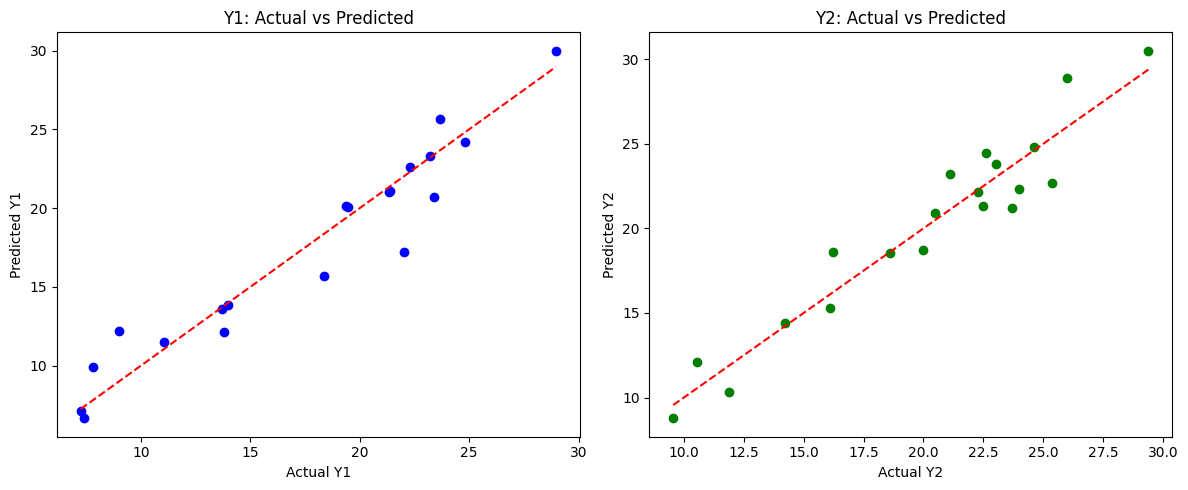

In [ ]:
# Multivariate Linear Regression with Gradient Descent (Vectorized)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# === Generate synthetic dataset ===
# Features: X1, X2
# Targets: Y1 = 3 + 2*X1 + 1*X2, Y2 = 5 + X1 + 2*X2

np.random.seed(0)
m = 100  # number of examples

X = np.random.rand(m, 2) * 10  # Two features
theta_true = np.array([[3, 5], [2, 1], [1, 2]])  # Shape: (3, 2)
X_bias = np.hstack((np.ones((m, 1)), X))  # Add bias term

Y = X_bias @ theta_true + np.random.randn(m, 2) * 2  # Add noise

# === Train/Test split ===
X_train, X_test, Y_train, Y_test = train_test_split(X_bias, Y, test_size=0.2, random_state=42)

# === Initialize parameters ===
n_features = X_train.shape[1]
n_outputs = Y_train.shape[1]
theta = np.zeros((n_features, n_outputs))

# === Hyperparameters ===
alpha = 0.01
epochs = 2000

# === Cost Function History ===
cost_history = []

# === Training Loop ===
for i in range(epochs):
    predictions = X_train @ theta
    error = predictions - Y_train
    cost = (1 / (2 * len(X_train))) * np.sum(error ** 2)
    cost_history.append(cost)

    gradients = (1 / len(X_train)) * (X_train.T @ error)
    theta -= alpha * gradients

    if i % 100 == 0:
        print(f"Epoch {i}: Cost = {cost:.4f}")

print("\nFinal Theta:")
print(theta)

# === Evaluate on Test Data ===
Y_pred_test = X_test @ theta
test_cost = (1 / (2 * len(X_test))) * np.sum((Y_pred_test - Y_test) ** 2)
print(f"\nTest Cost: {test_cost:.4f}")

# === Evaluation Metrics ===
for i in range(n_outputs):
    r2 = r2_score(Y_test[:, i], Y_pred_test[:, i])
    print(f"R² score for Output {i + 1}: {r2:.4f}")

# === Plot predictions vs actual for both outputs ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(Y_test[:, 0], Y_pred_test[:, 0], color='blue', label='Y1')
plt.plot([Y_test[:, 0].min(), Y_test[:, 0].max()], [Y_test[:, 0].min(), Y_test[:, 0].max()], 'r--')
plt.xlabel("Actual Y1"), plt.ylabel("Predicted Y1")
plt.title("Y1: Actual vs Predicted")

plt.subplot(1, 2, 2)
plt.scatter(Y_test[:, 1], Y_pred_test[:, 1], color='green', label='Y2')
plt.plot([Y_test[:, 1].min(), Y_test[:, 1].max()], [Y_test[:, 1].min(), Y_test[:, 1].max()], 'r--')
plt.xlabel("Actual Y2"), plt.ylabel("Predicted Y2")
plt.title("Y2: Actual vs Predicted")

plt.tight_layout()
plt.show()


Epoch 0: Cost = 392.6675
Epoch 200: Cost = 5.1673
Epoch 400: Cost = 4.6370
Epoch 600: Cost = 4.3204
Epoch 800: Cost = 4.1315
Epoch 1000: Cost = 4.0186
Epoch 1200: Cost = 3.9513
Epoch 1400: Cost = 3.9111
Epoch 1600: Cost = 3.8870
Epoch 1800: Cost = 3.8727

Final Theta:
Theta 0: [2.92072637 5.00256244]
Theta 1: [1.97041008 1.0270101 ]
Theta 2: [0.97419441 1.93386134]

Test Cost: 2.7968
R² Score for Output 1: 0.9243
R² Score for Output 2: 0.9122


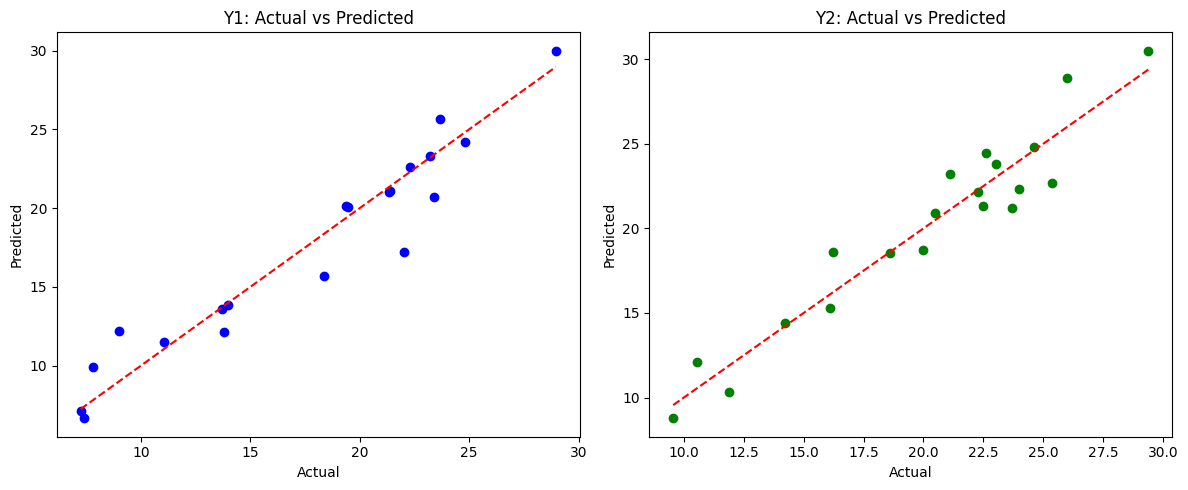

In [17]:
# Multivaritiate Linear Regression with Gradient Descent (without vectorization)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# === Generate synthetic data ===
np.random.seed(0)
m = 100  # Number of examples
X = np.random.rand(m, 2) * 10  # Two features: X1, X2

# True parameters for 2 outputs (Y1 and Y2)
theta_true = np.array([[3, 5], [2, 1], [1, 2]])  # Shape: (3, 2)
X_bias = np.hstack((np.ones((m, 1)), X))  # Add bias column
Y = X_bias @ theta_true + np.random.randn(m, 2) * 2  # Noisy outputs

# === Train/test split ===
X_train, X_test, Y_train, Y_test = train_test_split(X_bias, Y, test_size=0.2, random_state=42)

# === Initialize theta manually ===
n_features = X_train.shape[1]  # 3 (bias + 2 features)
n_outputs = Y_train.shape[1]   # 2 outputs
theta = np.zeros((n_features, n_outputs))

# === Hyperparameters ===
alpha = 0.01
epochs = 2000
m_train = len(X_train)

# === Gradient Descent without vectorization ===
cost_history = []

for epoch in range(epochs):
    # Initialize predictions
    predictions = [[0 for _ in range(n_outputs)] for _ in range(m_train)]

    # Step 1: Predict Y_hat = X_train * theta (manual)
    for i in range(m_train):
        for j in range(n_outputs):
            for k in range(n_features):
                predictions[i][j] += X_train[i][k] * theta[k][j]

    # Step 2: Compute error
    error = [[predictions[i][j] - Y_train[i][j] for j in range(n_outputs)] for i in range(m_train)]

    # Step 3: Compute cost (MSE)
    cost = sum([(error[i][j])**2 for i in range(m_train) for j in range(n_outputs)]) / (2 * m_train)
    cost_history.append(cost)

    # Step 4: Compute gradients and update theta
    gradients = [[0 for _ in range(n_outputs)] for _ in range(n_features)]
    for k in range(n_features):        # for each parameter
        for j in range(n_outputs):     # for each output
            for i in range(m_train):   # for each example
                gradients[k][j] += error[i][j] * X_train[i][k]
            gradients[k][j] /= m_train
            theta[k][j] -= alpha * gradients[k][j]

    # Print cost every 200 iterations
    if epoch % 200 == 0:
        print(f"Epoch {epoch}: Cost = {cost:.4f}")

print("\nFinal Theta:")
for i, row in enumerate(theta):
    print(f"Theta {i}: {row}")

# === Test set prediction ===
Y_pred_test = [[0 for _ in range(n_outputs)] for _ in range(len(X_test))]
for i in range(len(X_test)):
    for j in range(n_outputs):
        for k in range(n_features):
            Y_pred_test[i][j] += X_test[i][k] * theta[k][j]

# === Test Cost ===
test_error = [[Y_pred_test[i][j] - Y_test[i][j] for j in range(n_outputs)] for i in range(len(X_test))]
test_cost = sum([(test_error[i][j])**2 for i in range(len(X_test)) for j in range(n_outputs)]) / (2 * len(X_test))
print(f"\nTest Cost: {test_cost:.4f}")

# === R² Score for each output ===
Y_pred_test_np = np.array(Y_pred_test)
for j in range(n_outputs):
    r2 = r2_score(Y_test[:, j], Y_pred_test_np[:, j])
    print(f"R² Score for Output {j+1}: {r2:.4f}")

# === Plotting actual vs predicted ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(Y_test[:, 0], Y_pred_test_np[:, 0], color='blue')
plt.plot([min(Y_test[:, 0]), max(Y_test[:, 0])], [min(Y_test[:, 0]), max(Y_test[:, 0])], 'r--')
plt.title("Y1: Actual vs Predicted")
plt.xlabel("Actual"), plt.ylabel("Predicted")

plt.subplot(1, 2, 2)
plt.scatter(Y_test[:, 1], Y_pred_test_np[:, 1], color='green')
plt.plot([min(Y_test[:, 1]), max(Y_test[:, 1])], [min(Y_test[:, 1]), max(Y_test[:, 1])], 'r--')
plt.title("Y2: Actual vs Predicted")
plt.xlabel("Actual"), plt.ylabel("Predicted")

plt.tight_layout()
plt.show()



Final θ values: [199.72901919  72.43490428  19.65332264]

📊 Training Performance
MSE: 14261.80, MAE: 111.73, R²: -0.33

📊 Testing Performance
MSE: 17224.48, MAE: 123.90, R²: -3.96


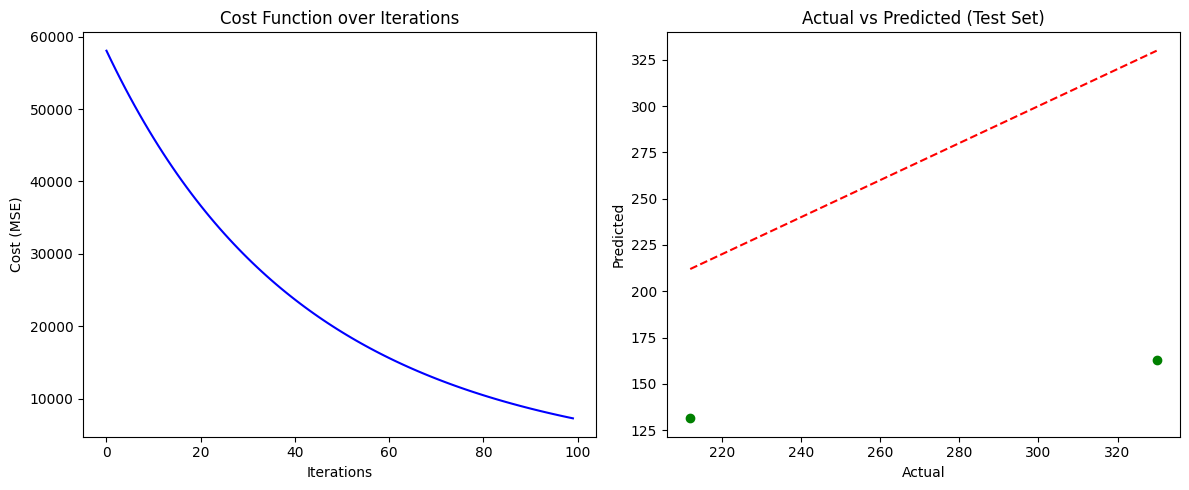

In [ ]:
# Multiple Linear Regression with Gradient Descent (Non-Vectorized)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Sample dataset: X1 = size, X2 = bedrooms | Y = price
X = np.array([
    [2104, 3],
    [1600, 3],
    [2400, 3],
    [1416, 2],
    [3000, 4],
    [1985, 4],
    [1534, 3],
    [1427, 3],
    [1380, 3],
    [1494, 3]
], dtype=float)

y = np.array([399.9, 329.9, 369.0, 232.0, 539.9, 299.9, 314.9, 198.9, 212.0, 242.5], dtype=float)

# Normalize features (important for gradient descent)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

# Add bias column (intercept term)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Descent Parameters
alpha = 0.01      # learning rate
iterations = 100  # number of iterations
m = X_train.shape[0]
n = X_train.shape[1]
theta = np.zeros(n)
cost_history = []

# Gradient Descent (Non-vectorized)
for itr in range(iterations):
    predictions = np.zeros(m)
    for i in range(m):
        predictions[i] = sum(theta[j] * X_train[i][j] for j in range(n))
    
    errors = predictions - y_train
    temp_theta = theta.copy()
    
    for j in range(n):
        gradient = sum(errors[i] * X_train[i][j] for i in range(m)) / m
        temp_theta[j] = temp_theta[j] - alpha * gradient
    
    theta = temp_theta.copy()
    cost = sum((predictions[i] - y_train[i])**2 for i in range(m)) / (2 * m)
    cost_history.append(cost)

# Final Parameters
print("\nFinal θ values:", theta)

# Evaluate on Training Data
train_preds = np.dot(X_train, theta)
train_mse = mean_squared_error(y_train, train_preds)
train_mae = mean_absolute_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

# Evaluate on Test Data
test_preds = np.dot(X_test, theta)
test_mse = mean_squared_error(y_test, test_preds)
test_mae = mean_absolute_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

print("\n📊 Training Performance")
print(f"MSE: {train_mse:.2f}, MAE: {train_mae:.2f}, R²: {train_r2:.2f}")

print("\n📊 Testing Performance")
print(f"MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.2f}")

# Visualization
plt.figure(figsize=(12, 5))

# Cost Function Plot
plt.subplot(1, 2, 1)
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Cost Function over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')

# Actual vs Predicted for Test Data
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_preds, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Test Set)")

plt.tight_layout()
plt.show()



Final θ (parameters): [199.72901919  72.43490428  19.65332264]

📊 Training Metrics
MSE: 14261.80, MAE: 111.73, R²: -0.33

📊 Testing Metrics
MSE: 17224.48, MAE: 123.90, R²: -3.96


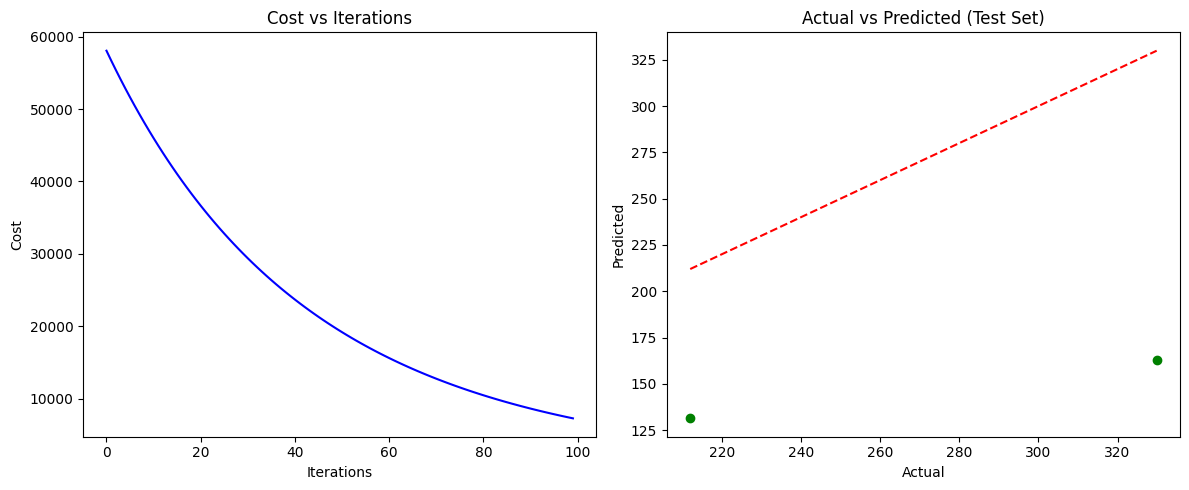

In [20]:
# Multple Linear Regression with Gradient Descent (Vectorized)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Sample dataset: [size (sq ft), number of bedrooms] => price (in $1000)
X = np.array([
    [2104, 3],
    [1600, 3],
    [2400, 3],
    [1416, 2],
    [3000, 4],
    [1985, 4],
    [1534, 3],
    [1427, 3],
    [1380, 3],
    [1494, 3]
], dtype=float)

y = np.array([399.9, 329.9, 369.0, 232.0, 539.9, 299.9, 314.9, 198.9, 212.0, 242.5], dtype=float)

# Normalize features (mean normalization)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

# Add bias (intercept) column
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters
m, n = X_train.shape
theta = np.zeros(n)
alpha = 0.01
iterations = 100
cost_history = []

# Gradient Descent (Vectorized)
for i in range(iterations):
    predictions = X_train.dot(theta)
    errors = predictions - y_train
    gradients = (1 / m) * X_train.T.dot(errors)
    theta -= alpha * gradients
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    cost_history.append(cost)

# Final parameters
print("\nFinal θ (parameters):", theta)

# Evaluation on training data
train_preds = X_train.dot(theta)
train_mse = mean_squared_error(y_train, train_preds)
train_mae = mean_absolute_error(y_train, train_preds)
train_r2 = r2_score(y_train, train_preds)

# Evaluation on test data
test_preds = X_test.dot(theta)
test_mse = mean_squared_error(y_test, test_preds)
test_mae = mean_absolute_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

print("\n📊 Training Metrics")
print(f"MSE: {train_mse:.2f}, MAE: {train_mae:.2f}, R²: {train_r2:.2f}")

print("\n📊 Testing Metrics")
print(f"MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.2f}")

# Visualization
plt.figure(figsize=(12, 5))

# Cost Function plot
plt.subplot(1, 2, 1)
plt.plot(range(iterations), cost_history, color='blue')
plt.title("Cost vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")

# Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_preds, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Test Set)")

plt.tight_layout()
plt.show()


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
# Load dataset
url = 'https://raw.githubusercontent.com/Ankit152/Fish-Market/main/Fish.csv'
df = pd.read_csv(url)

# Encode 'Species' categorical variable
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Features and target variable
X = df.drop('Weight', axis=1)
y = df['Weight']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
# Add intercept term to feature matrices
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Initialize theta (parameters)
theta = np.zeros(X_train_b.shape[1])

# Set hyperparameters
alpha = 0.01  # Learning rate
iterations = 1000
m = len(y_train)
cost_history = []

In [26]:
for i in range(iterations):
    predictions = X_train_b.dot(theta)
    errors = predictions - y_train
    gradients = (1/m) * X_train_b.T.dot(errors)
    theta -= alpha * gradients
    cost = (1/(2*m)) * np.sum(errors ** 2)
    cost_history.append(cost)

In [27]:
# Predictions
y_train_pred = X_train_b.dot(theta)
y_test_pred = X_test_b.dot(theta)

# Evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print("Training Set Evaluation:")
print(f"MSE: {train_mse:.2f}, MAE: {train_mae:.2f}, R²: {train_r2:.2f}")

print("\nTesting Set Evaluation:")
print(f"MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, R²: {test_r2:.2f}")

Training Set Evaluation:
MSE: 14346.95, MAE: 90.13, R²: 0.88

Testing Set Evaluation:
MSE: 15981.99, MAE: 103.25, R²: 0.89


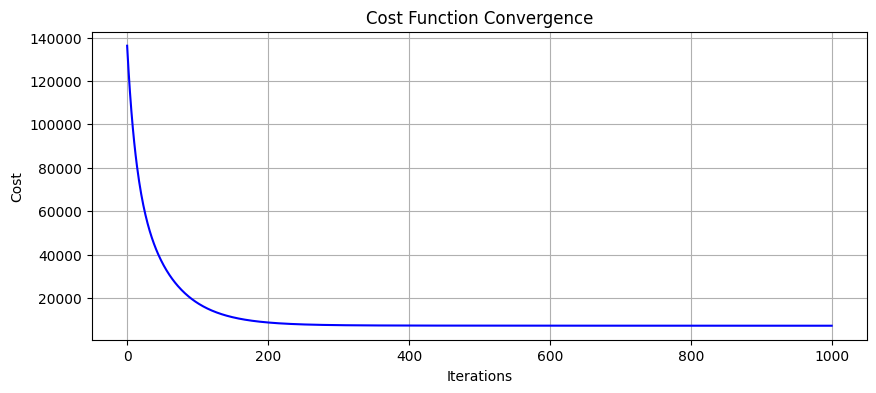

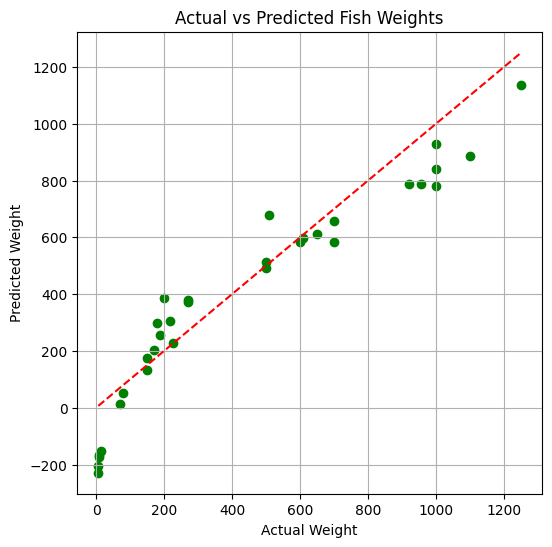

In [28]:
# Plot cost function over iterations
plt.figure(figsize=(10, 4))
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# Scatter plot of actual vs predicted weights
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_test_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs Predicted Fish Weights')
plt.grid(True)
plt.show()